# **Airbnb Listing Analysis**

## Profile and QA the Data

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
listings = pd.read_csv('../../Desktop/Maven/Python/Projects/Airbnb Data/Listings.csv', low_memory = False, encoding='ISO-8859-1',
                      parse_dates = ['host_since'])

In [30]:
listings.head(2)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


## Selecting Paris

In [5]:
paris_listings = listings[listings.city == 'Paris']

In [7]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64690 non-null  int64         
 1   name                         64627 non-null  object        
 2   host_id                      64690 non-null  int64         
 3   host_since                   64657 non-null  datetime64[ns]
 4   host_location                64522 non-null  object        
 5   host_response_time           23346 non-null  object        
 6   host_response_rate           23346 non-null  float64       
 7   host_acceptance_rate         31919 non-null  float64       
 8   host_is_superhost            64657 non-null  object        
 9   host_total_listings_count    64657 non-null  float64       
 10  host_has_profile_pic         64657 non-null  object        
 11  host_identity_verified       64657 non-null  

### Columns Selection

In [9]:
paris_listings = paris_listings[['host_since', 'neighbourhood', 'city', 'accommodates',  'price']]

In [11]:
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


## Missing Values

In [22]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [28]:
paris_listings[paris_listings.isna().any(axis=1)]

,host_since,neighbourhood,city,accommodates,price
52879,NaT,Enclos-St-Laurent,Paris,2,57
52880,NaT,Enclos-St-Laurent,Paris,2,58
52881,NaT,Batignolles-Monceau,Paris,4,90
52882,NaT,Buttes-Montmartre,Paris,5,89
52883,NaT,Hotel-de-Ville,Paris,2,119
52884,NaT,Buttes-Montmartre,Paris,4,50
52885,NaT,Enclos-St-Laurent,Paris,6,220
52886,NaT,Popincourt,Paris,2,45
52887,NaT,Popincourt,Paris,4,100
52888,NaT,Menilmontant,Paris,2,50


## Exploratory Data Analysis
* Average, maximum and minimum values

In [36]:
def mean_max_min(data):
    for col in data.select_dtypes(include='number').columns:
        print(f"The mean, min, max values for the column '{col}' are the following:")
        print(f"mean: {data[col].mean():.2f}, min: {data[col].min():.2f}, max: {data[col].max():.2f}")
        print('')  # To add a line break for better readability

In [38]:
mean_max_min(paris_listings)

The mean, min, max values for the column 'accommodates' are the following:
mean: 3.04, min: 0.00, max: 16.00

The mean, min, max values for the column 'price' are the following:
mean: 113.10, min: 0.00, max: 12000.00



In [42]:
paris_listings.neighbourhood.value_counts()

neighbourhood
Buttes-Montmartre      7237
Popincourt             6206
Vaugirard              4826
Enclos-St-Laurent      4628
Batignolles-Monceau    4330
Menilmontant           3758
Buttes-Chaumont        3728
Passy                  3215
Opera                  3157
Temple                 2943
Reuilly                2654
Observatoire           2485
Gobelins               2278
Bourse                 2188
Pantheon               2140
Luxembourg             1998
Hotel-de-Ville         1972
Palais-Bourbon         1771
Elysee                 1768
Louvre                 1408
Name: count, dtype: int64

### Values Distribution and Outliers

In [76]:
def box_plot(data):
    for col in data.select_dtypes('number'):
        sns.boxplot(data=data, x=data[col])
        plt.xlabel(col)
        plt.show()

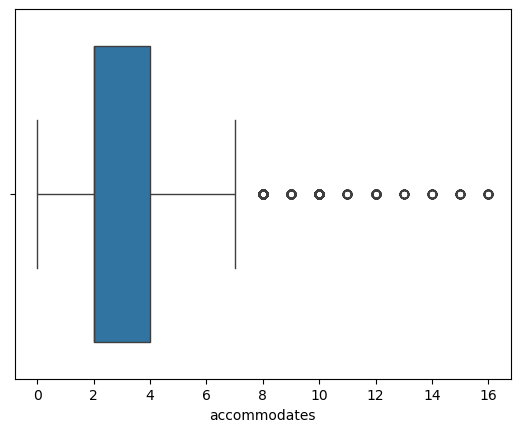

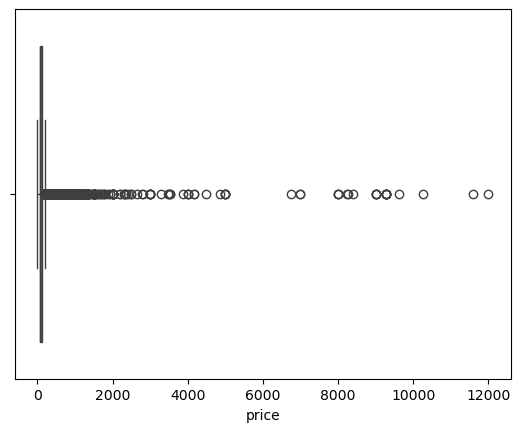

In [78]:
box_plot(paris_listings)

## **Prepare the Data for Visualization**

### Mean Price by Neighborhood for Paris Listings

In [183]:
paris_listings_neighbourhood = (paris_listings
                                .groupby('neighbourhood')
                                .agg({'price': 'mean'})
                                .sort_values('price'))

In [187]:
# The 5 cheapest neighboorhodds in Paris
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [189]:
# The 5 most expensive neighboorhoods in Paris
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


### Mean Price by Accommodations for Most Expensive Neighborhood in Paris Listings

In [153]:
paris_listings_accommodates = (paris_listings
 .query('neighbourhood=="Elysee"')
 .groupby('accommodates')
 .agg({'price': 'mean'})
 .sort_values('price'))

In [155]:
# The 5 lower Accommodation Prices
paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [157]:
# The 5 highest Accommodation prices
paris_listings_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


### Average Price and New Host Count by Year in Paris Listings

In [173]:
paris_listings_over_time = (paris_listings
                            .set_index('host_since')
                            .resample('Y')
                            .agg({'neighbourhood': 'count', 'price': 'mean'}))

In [175]:
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## **Visualize the Data**

### Horizontal Bar Chart of Average Price by Paris Neighborhood

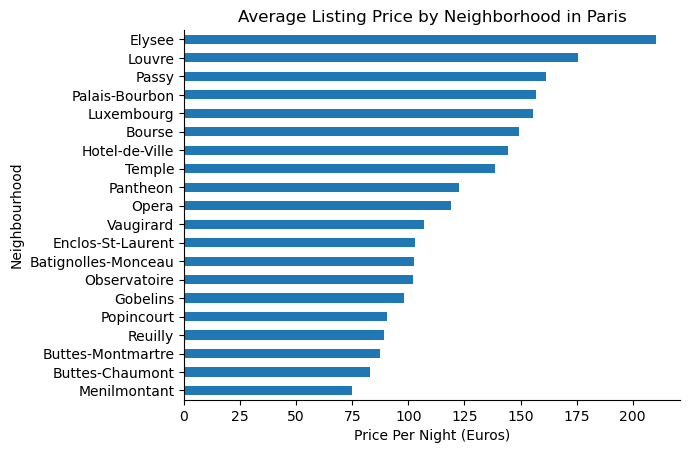

In [231]:
# Plot the horizontal bar chart
ax = paris_listings_neighbourhood.plot.barh(legend=None)

# Add labels and title
ax.set_xlabel('Price Per Night (Euros)')  # X-axis label
ax.set_ylabel('Neighbourhood')  # Y-axis label
ax.set_title('Average Listing Price by Neighborhood in Paris')  # Title

sns.despine()

# Show the plot
plt.show()

### Horizontal Bar Chart of Average Price by Accommodates in Paris' Most Expensive Neighborhood 

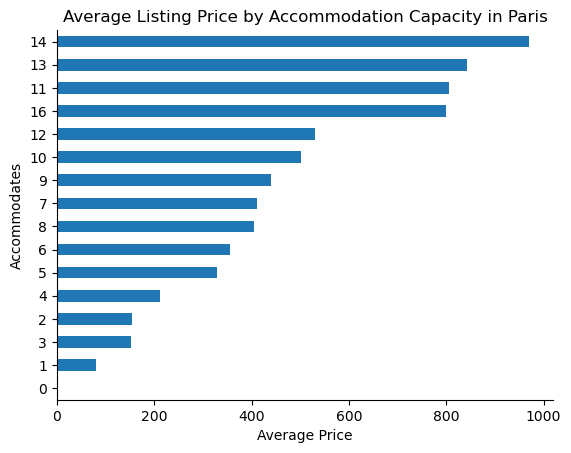

In [237]:
# Plot the horizontal bar chart
ax = paris_listings_accommodates.plot.barh(legend=None)

# Add labels and title
ax.set_xlabel('Average Price')  # X-axis label
ax.set_ylabel('Accommodates')  # Y-axis label
ax.set_title('Average Listing Price by Accommodation Capacity in Paris')  # Title

sns.despine()

# Show the plot
plt.show()


### Line Chart for the New Airbnb Hosts Over Time

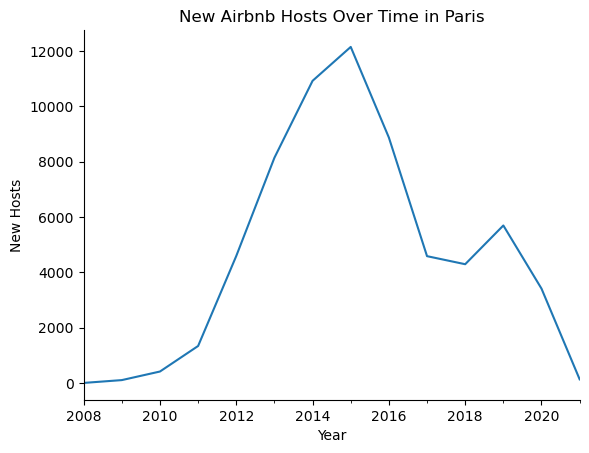

In [247]:
(paris_listings_over_time['neighbourhood']
 .plot
 .line(ylabel='New Hosts', 
       xlabel = 'Year',
       title='New Airbnb Hosts Over Time in Paris'))

sns.despine()

### Line Chart for the Average Prices in Paris Over Time

<Axes: title={'center': 'Average Airbnb Price in Paris Over Time'}, xlabel='Year', ylabel='Average Price (Euros)'>

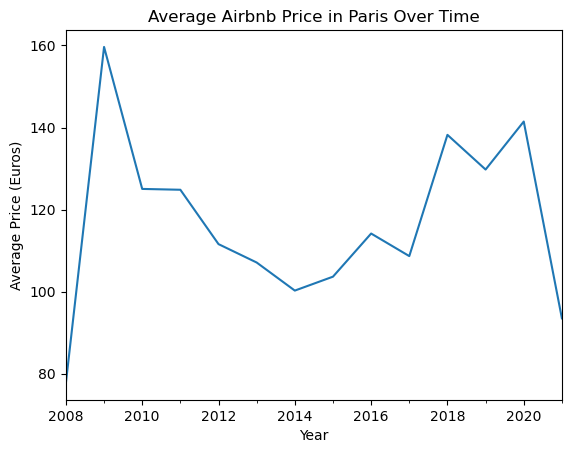

In [259]:
(paris_listings_over_time['price']
 .plot.line(title='Average Airbnb Price in Paris Over Time', 
            xlabel='Year',
           ylabel='Average Price (Euros)'))

### Combine both line charts

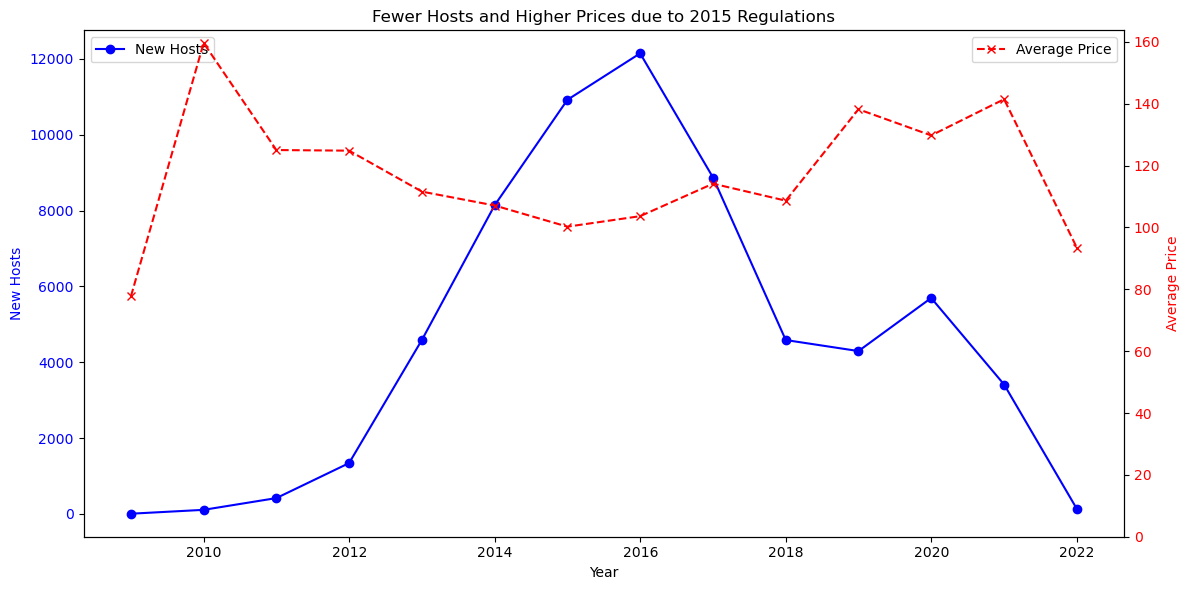

In [269]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the count of new hosts
ax1.plot(paris_listings_over_time.index, 
         paris_listings_over_time['neighbourhood'], 
         color='blue', marker='o', label='New Hosts')
ax1.set_xlabel('Year')
ax1.set_ylabel('New Hosts', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Fewer Hosts and Higher Prices due to 2015 Regulations')

# Create a second y-axis for average price
ax2 = ax1.twinx()
ax2.plot(paris_listings_over_time.index, 
         paris_listings_over_time['price'], 
         color='red', marker='x', linestyle='--', label='Average Price')
ax2.set_ylabel('Average Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.set_ylim(0)


# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()